---
# **1. Import he libraries that you will need in EDA**

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

---
# **2. Load the data in a  dataframe**

In [14]:
df = pd.read_csv("Housing.csv")
# To display the top 5 rows 
df.head(5)               

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [15]:
df.tail(5)                        # To display the botton 5 rows

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished




---


# **3. Show the datasets and determine the number of rows and columns**






In [39]:
print(df)
df.shape

       price  area  BR  bathrooms  STR   MR guestroom basement  parking  \
40   7875000  6550   3          1    2  yes        no      yes        0   
55   7350000  6000   3          1    2  yes        no       no        1   
61   7070000  8880   2          1    1  yes        no       no        1   
68   6860000  6000   3          1    1  yes        no       no        1   
74   6650000  4040   3          1    2  yes        no      yes        1   
..       ...   ...  ..        ...  ...  ...       ...      ...      ...   
540  1820000  3000   2          1    1  yes        no      yes        2   
541  1767150  2400   3          1    1   no        no       no        0   
542  1750000  3620   2          1    1  yes        no       no        0   
543  1750000  2910   3          1    1   no        no       no        0   
544  1750000  3850   3          1    2  yes        no       no        0   

    prefarea furnishingstatus  
40       yes        furnished  
55        no      unfurnished  
61 

(357, 11)

---
# **4. Check the type of data**

In [17]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

---
# **5. Drop the irrelevant  features like airconditioning , heat watering**

In [18]:
df = df.drop(['airconditioning','hotwaterheating'], axis=1)
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,2,no,furnished


---
# **6. Rename the columns bedroom to BR,  stories to STR, mainroad to MR**

In [19]:
df = df.rename(columns={"bedrooms":"BR","stories":"STR","mainroad":"MR" })
df.head(5)

,price,area,BR,bathrooms,STR,MR,guestroom,basement,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,2,no,furnished


---
# **7. Dropped the duplicate rows**

In [20]:
df.shape
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)
df.count()      # Used to count the number of rows
df = df.drop_duplicates()
df.head(5)

number of duplicate rows:  (0, 11)


,price,area,BR,bathrooms,STR,MR,guestroom,basement,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,2,no,furnished


---
# **8. Dropped missing values and show how many values has been dropped**


In [21]:
print(df.isnull().sum())
df = df.dropna()    # Dropping the missing values.
df.count()
print(df.isnull().sum())

price               0
area                0
BR                  0
bathrooms           0
STR                 0
MR                  0
guestroom           0
basement            0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
price               0
area                0
BR                  0
bathrooms           0
STR                 0
MR                  0
guestroom           0
basement            0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


---
# **9. Detect outliers:**

In [28]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price        1879500.0
area            2510.0
BR                 1.0
bathrooms          0.0
STR                1.0
parking            1.0
dtype: float64


In [29]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(357, 11)

---
# **10. Create a boxplot, scatter plot and histogram , heat map for visualization.**

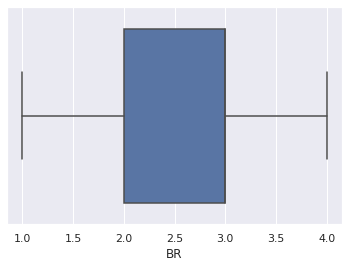

In [30]:
#Boxplot
sns.boxplot(x=df['BR'])

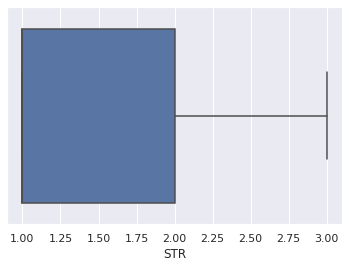

In [31]:
#Boxplot
sns.boxplot(x=df['STR'])

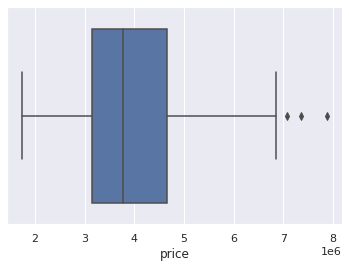

In [32]:
#boxplot
sns.boxplot(x=df['price'])

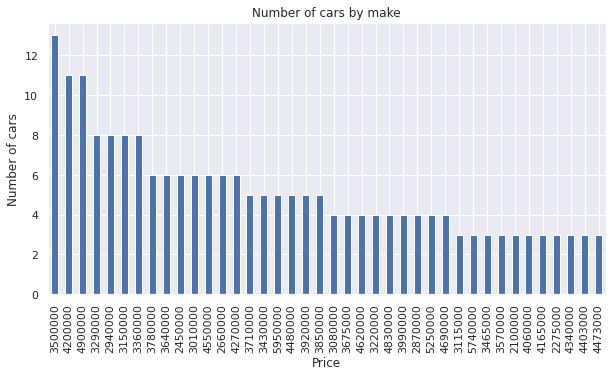

In [35]:
#Histogram
df.price.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Price');

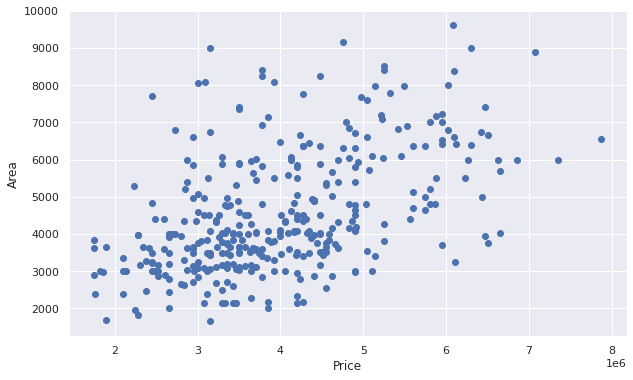

In [36]:
#scatterplot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['price'], df['area'])
ax.set_xlabel('Price')
ax.set_ylabel('Area')
plt.show()

,price,area,BR,bathrooms,STR,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
BR,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
STR,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


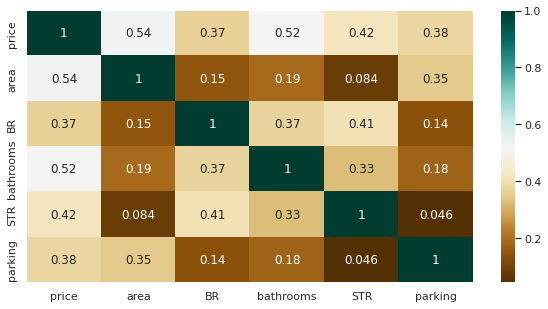

In [ ]:
#Heat Maps
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c